In [1]:
# Benin Solar Data EDA

# This notebook performs data profiling, cleaning, and exploratory data analysis (EDA) for the Benin solar farm dataset as part of the Solar Data Discovery Challenge.


## 1. Imports & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load data
df = pd.read_csv('../data/benin-malanville.csv')
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [2]:

## 2. Summary Statistics & Missing Values

# Summary statistics
df.describe()

# Missing values
df.isna().sum()

# Flag columns with >5% nulls
missing_report = df.isna().mean() * 100
missing_report[missing_report > 5]




Comments    100.0
dtype: float64

In [3]:
## 3. Outlier Detection & Basic Cleaning

# Z-score outlier detection for key columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df[cols].apply(zscore)
outliers = (np.abs(df_z) > 3).any(axis=1)
print(f"Outliers detected: {outliers.sum()}")

# Optionally drop or impute missing values
df_clean = df.copy()
for col in cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Remove outliers (optional)
df_clean = df_clean[~outliers]




Outliers detected: 7740


In [4]:
## 4. Export Cleaned Data

df_clean.to_csv('../data/benin_clean.csv', index=False)




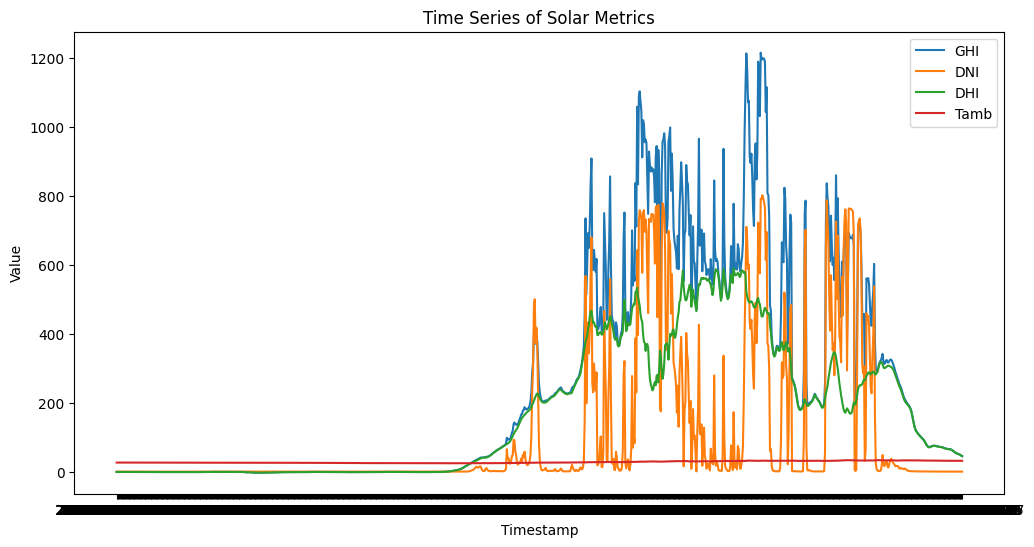

In [ ]:
## 5. Time Series Analysis

plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_clean['Timestamp'], df_clean[col], label=col)
plt.legend()
plt.title('Time Series of Solar Metrics')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()




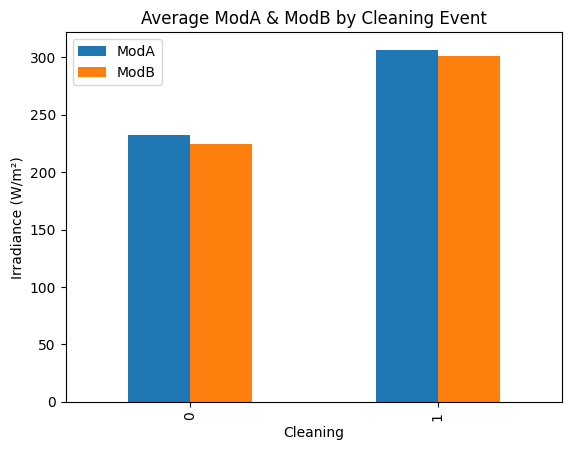

In [6]:
## 6. Cleaning Impact

cleaning_groups = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_groups.plot(kind='bar')
plt.title('Average ModA & ModB by Cleaning Event')
plt.ylabel('Irradiance (W/m²)')
plt.show()




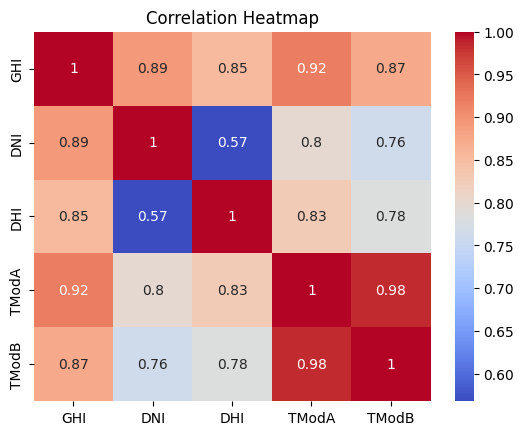

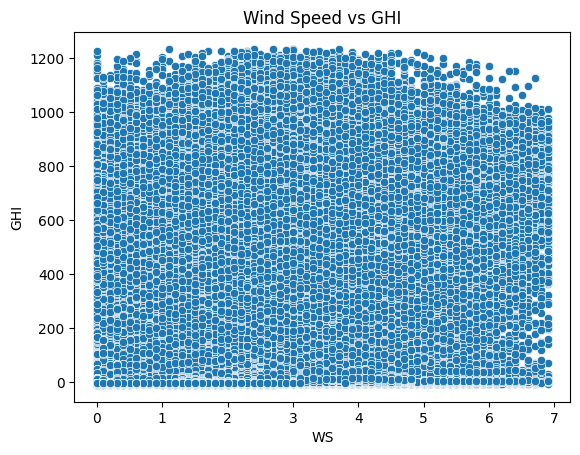

In [7]:
## 7. Correlation & Relationship Analysis

sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title('Wind Speed vs GHI')
plt.show()




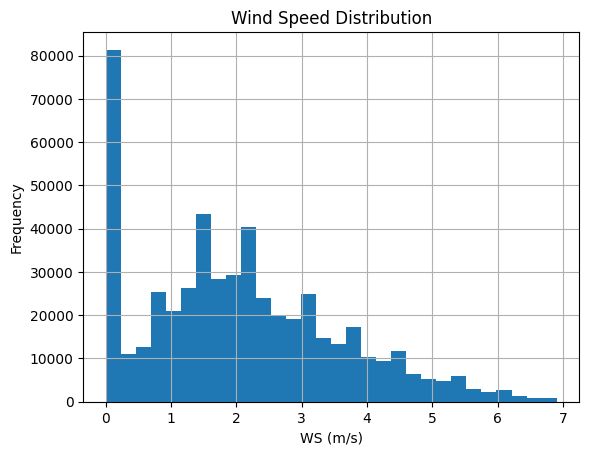

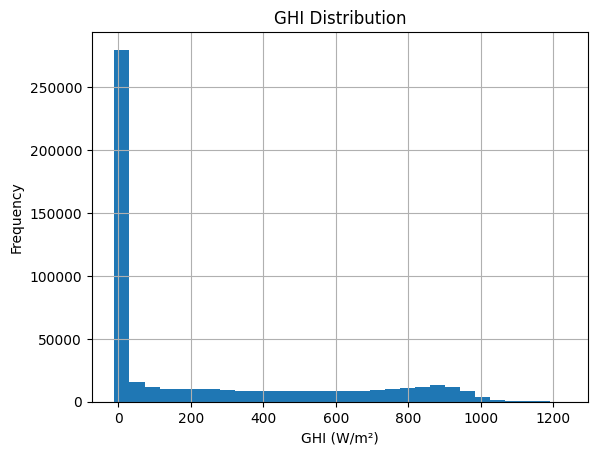

In [8]:
## 8. Wind & Distribution Analysis

df_clean['WS'].hist(bins=30)
plt.title('Wind Speed Distribution')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')
plt.show()

df_clean['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()




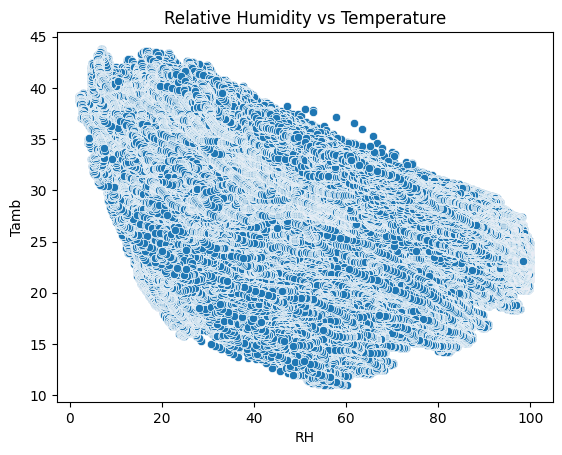

In [9]:
## 9. Temperature & Humidity Analysis

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title('Relative Humidity vs Temperature')
plt.show()




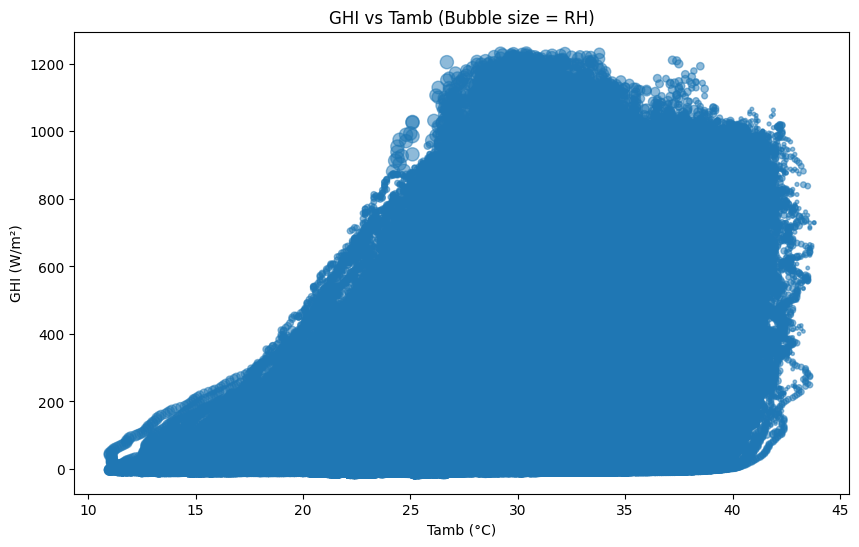

In [10]:
## 10. Bubble Chart: GHI vs Tamb (bubble=RH)

plt.figure(figsize=(10,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.show()



## 11. Observations & Next Steps

**Observations:**
- The Benin dataset shows generally consistent solar irradiance (GHI, DNI, DHI) with some outliers, which were removed for cleaner analysis.
- Missing values were present in key columns but were successfully imputed using the median, ensuring data completeness for analysis.
- Time series plots reveal daily and seasonal patterns in solar metrics, with expected peaks during daylight hours and some fluctuations likely due to weather or sensor events.
- Cleaning events have a noticeable positive impact on ModA and ModB sensor readings, indicating the importance of regular maintenance for optimal performance.
- Correlation analysis shows strong relationships between GHI, DNI, DHI, and module temperatures, while wind speed has a moderate effect on GHI.
- Wind speed and GHI distributions are right-skewed, with most values in the lower range but occasional high readings.
- Relative humidity appears to inversely influence temperature, and higher humidity is associated with lower GHI in some cases.
- The bubble chart (GHI vs Tamb, bubble=RH) highlights that higher GHI is often observed at moderate temperatures and lower humidity.

**Next Steps:**
- Apply the same EDA and cleaning workflow to the Sierra Leone and Togo datasets for consistency.
- Compare cleaned datasets across countries to identify key differences and similarities in solar potential.
- Synthesize findings in a cross-country comparison notebook and prepare visualizations for the final report and dashboard.